### 0. Importación de librerías y carga de datos

In [1]:
# Librerías para manejo de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Composicion de pipelines
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split

# Regresion lineal
from sklearn.linear_model import LinearRegression

# Importar/ Exportar modelos
from joblib import dump, load

# Metricas
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

# q-q plots
import scipy.stats as stats

# Para sacar un reporte estadístico que podemos usar para determinar las importancia de las variables explicativas.
import statsmodels.api as sm 

In [2]:
# Se cargan los datos
# Ubicación de los datos, deben estar en la misma carpeta que este notebook

pais, liga = "belgica", "jupiler-pro-league"
#pais, liga = "espana", "laliga"
#pais, liga = "espana", "laliga-smartbank"
#pais, liga = "francia", "ligue-1"
#pais, liga = "francia", "ligue-2"
#pais, liga = "inglaterra", "championship"
#pais, liga = "inglaterra", "premier-league"
#pais, liga = "italia", "serie-a"
#pais, liga = "italia", "serie-b"
#pais, liga = "paises-bajos", "eredivisie"
#pais, liga = "portugal", "liga-portugal"
#pais, liga = "turquia", "super-lig"
#pais, liga = "colombia", "primera-a"
#pais, liga = "brasil", "brasileirao-serie-a"

version = 1

db_location = f"../data/2023-24/version{version}/anteriores/{pais}_{liga}_23-24.csv"

# Se leen los datos, estan separados con ','
data = pd.read_csv(db_location, sep=',', encoding = 'utf-8', na_values = '-')

### 1. Entendimiento de los datos

In [3]:
# Se revisa la forma general de los datos cargados
data.shape

(157, 50)

In [4]:
# Se muestra una pequeña muestra de los datos
data.head()

,Date,HomeTeam,AwayTeam,HG,AG,HxG,AxG,HP,AP,HTS,...,AA,HDA,ADA,HClC,AClC,HCrC,ACrC,HDC,ADC,Resultado
0,26.12.2023 14:45,Club Brujas,Royale Union SG,1,1,1.71,0.83,60,40,9,...,108,54,39,NaN,NaN,NaN,NaN,NaN,NaN,0
1,26.12.2023 12:30,Westerlo,RWDM,3,0,1.97,0.98,49,51,13,...,68,52,26,NaN,NaN,NaN,NaN,NaN,NaN,3
2,26.12.2023 10:00,Kortrijk,Gent,0,2,0.54,2.10,30,70,7,...,148,31,65,NaN,NaN,NaN,NaN,NaN,NaN,-2
3,26.12.2023 10:00,Leuven,Eupen,3,0,1.83,0.98,47,53,18,...,76,55,41,NaN,NaN,NaN,NaN,NaN,NaN,3
4,26.12.2023 07:30,Genk,Antwerp,3,0,1.55,0.09,51,49,16,...,90,64,31,NaN,NaN,NaN,NaN,NaN,NaN,3


In [5]:
# Se imprimen los diferentes tipos de las columnas. Todas son numéricas
data.dtypes

Date          object
HomeTeam      object
AwayTeam      object
HG             int64
AG             int64
HxG          float64
AxG          float64
HP             int64
AP             int64
HTS            int64
ATS            int64
HSI            int64
ASI            int64
HSO            int64
ASO            int64
HBS          float64
ABS          float64
HFK          float64
AFK          float64
HC             int64
AC             int64
HOFF           int64
AOFF           int64
HTI            int64
ATI            int64
HGS            int64
AGS            int64
HF             int64
AF             int64
HRC            int64
ARC            int64
HYC            int64
AYC            int64
HTP          float64
ATP          float64
HPC          float64
APC          float64
HT           float64
AT           float64
HA             int64
AA             int64
HDA            int64
ADA            int64
HClC         float64
AClC         float64
HCrC         float64
ACrC         float64
HDC          

In [6]:
# Se hace una decripción de los datos
data.describe()

,HG,AG,HxG,AxG,HP,AP,HTS,ATS,HSI,ASI,...,AA,HDA,ADA,HClC,AClC,HCrC,ACrC,HDC,ADC,Resultado
count,157.000000,157.000000,94.000000,94.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,...,157.000000,157.000000,157.000000,0.0,0.0,0.0,0.0,0.0,0.0,157.000000
mean,1.611465,1.222930,1.474681,1.122766,50.566879,49.433121,14.681529,12.286624,5.076433,4.407643,...,103.802548,54.681529,48.866242,NaN,NaN,NaN,NaN,NaN,NaN,0.388535
std,1.371176,1.146895,1.019445,0.827323,9.797484,9.797484,5.590787,5.470259,2.500106,2.513949,...,25.964087,19.200373,20.264310,NaN,NaN,NaN,NaN,NaN,NaN,1.966546
min,0.000000,0.000000,0.250000,0.080000,26.000000,26.000000,1.000000,2.000000,1.000000,0.000000,...,45.000000,19.000000,12.000000,NaN,NaN,NaN,NaN,NaN,NaN,-5.000000
25%,1.000000,0.000000,0.735000,0.572500,44.000000,42.000000,10.000000,8.000000,3.000000,3.000000,...,85.000000,41.000000,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,-1.000000
50%,1.000000,1.000000,1.210000,1.005000,51.000000,49.000000,14.000000,12.000000,5.000000,4.000000,...,101.000000,54.000000,43.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,2.000000,2.000000,1.887500,1.457500,58.000000,56.000000,18.000000,16.000000,7.000000,6.000000,...,117.000000,67.000000,62.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
max,7.000000,6.000000,6.410000,5.610000,74.000000,74.000000,29.000000,28.000000,13.000000,10.000000,...,174.000000,120.000000,105.000000,NaN,NaN,NaN,NaN,NaN,NaN,6.000000


### 2. Identificación de variables a utilizar

In [7]:
#selected_cols = ['HTS', 'ATS', 'HSI', 'ASI', 'HSO', 'ASO', 'HBS', 'ABS', 'HGS', 'AGS', 'HRC', 'ARC']
#selected_cols2 = ['HG', 'AG',  'HxG', 'AxG', 'HP', 'AP',
#                 'HFK', 'AFK', 'HC', 'AC', 'HOFF', 'AOFF', 'HTI', 'ATI', 'HGS', 'AGS', 'HF', 'AF', 'HRC', 'ARC',
#                 'HYC', 'AYC', 'HTP', 'ATP', 'HPC', 'APC', 'HT', 'AT', 'HA', 'AA', 'HDA', 'ADA', 'HClC', 'AClC',
#                 'HCrC', 'ACrC', 'HDC', 'ADC']
selected_cols = ['HG', 'AG',  'HxG', 'AxG', 'HP', 'AP', 'HTS', 'ATS', 'HSI', 'ASI', 'HSO', 'ASO', 'HBS', 'ABS',
                 'HFK', 'AFK', 'HC', 'AC', 'HOFF', 'AOFF', 'HTI', 'ATI', 'HGS', 'AGS', 'HF', 'AF', 'HRC', 'ARC',
                 'HYC', 'AYC', 'HTP', 'ATP', 'HPC', 'APC', 'HT', 'AT', 'HA', 'AA', 'HDA', 'ADA', 'HClC', 'AClC',
                 'HCrC', 'ACrC', 'HDC', 'ADC']

### 3. Limpieza y preparación de datos

In [8]:
# los pasos de limpieza y preparación se realizan sobre otro archivo
df_data = data.copy()[selected_cols]
df_data.insert(0, "Resultado", data["Resultado"])

In [9]:
# Se observa que no existen valores nulos en las variables
df_data.isnull().sum()

Resultado      0
HG             0
AG             0
HxG           63
AxG           63
HP             0
AP             0
HTS            0
ATS            0
HSI            0
ASI            0
HSO            0
ASO            0
HBS          156
ABS          156
HFK          145
AFK          145
HC             0
AC             0
HOFF           0
AOFF           0
HTI            0
ATI            0
HGS            0
AGS            0
HF             0
AF             0
HRC            0
ARC            0
HYC            0
AYC            0
HTP            2
ATP            2
HPC          157
APC          157
HT           157
AT           157
HA             0
AA             0
HDA            0
ADA            0
HClC         157
AClC         157
HCrC         157
ACrC         157
HDC          157
ADC          157
dtype: int64

In [10]:
#columns_to_drop = ['HBS', 'ABS']
columns_to_drop = ['HxG', 'AxG', 'HBS', 'ABS', 'HFK', 'AFK', 'HPC', 'APC', 'HT', 'AT', 'HClC', 'AClC',
                   'HCrC', 'ACrC', 'HDC', 'ADC']
df_data = df_data.drop(columns=columns_to_drop)

In [11]:
df_data.shape

(157, 31)

In [12]:
df_data = df_data.dropna()
df_data.shape

(155, 31)

In [13]:
df_data.head()
output_file = 'output.xlsx'
df_data.to_excel(output_file, index=False)

<Axes: >

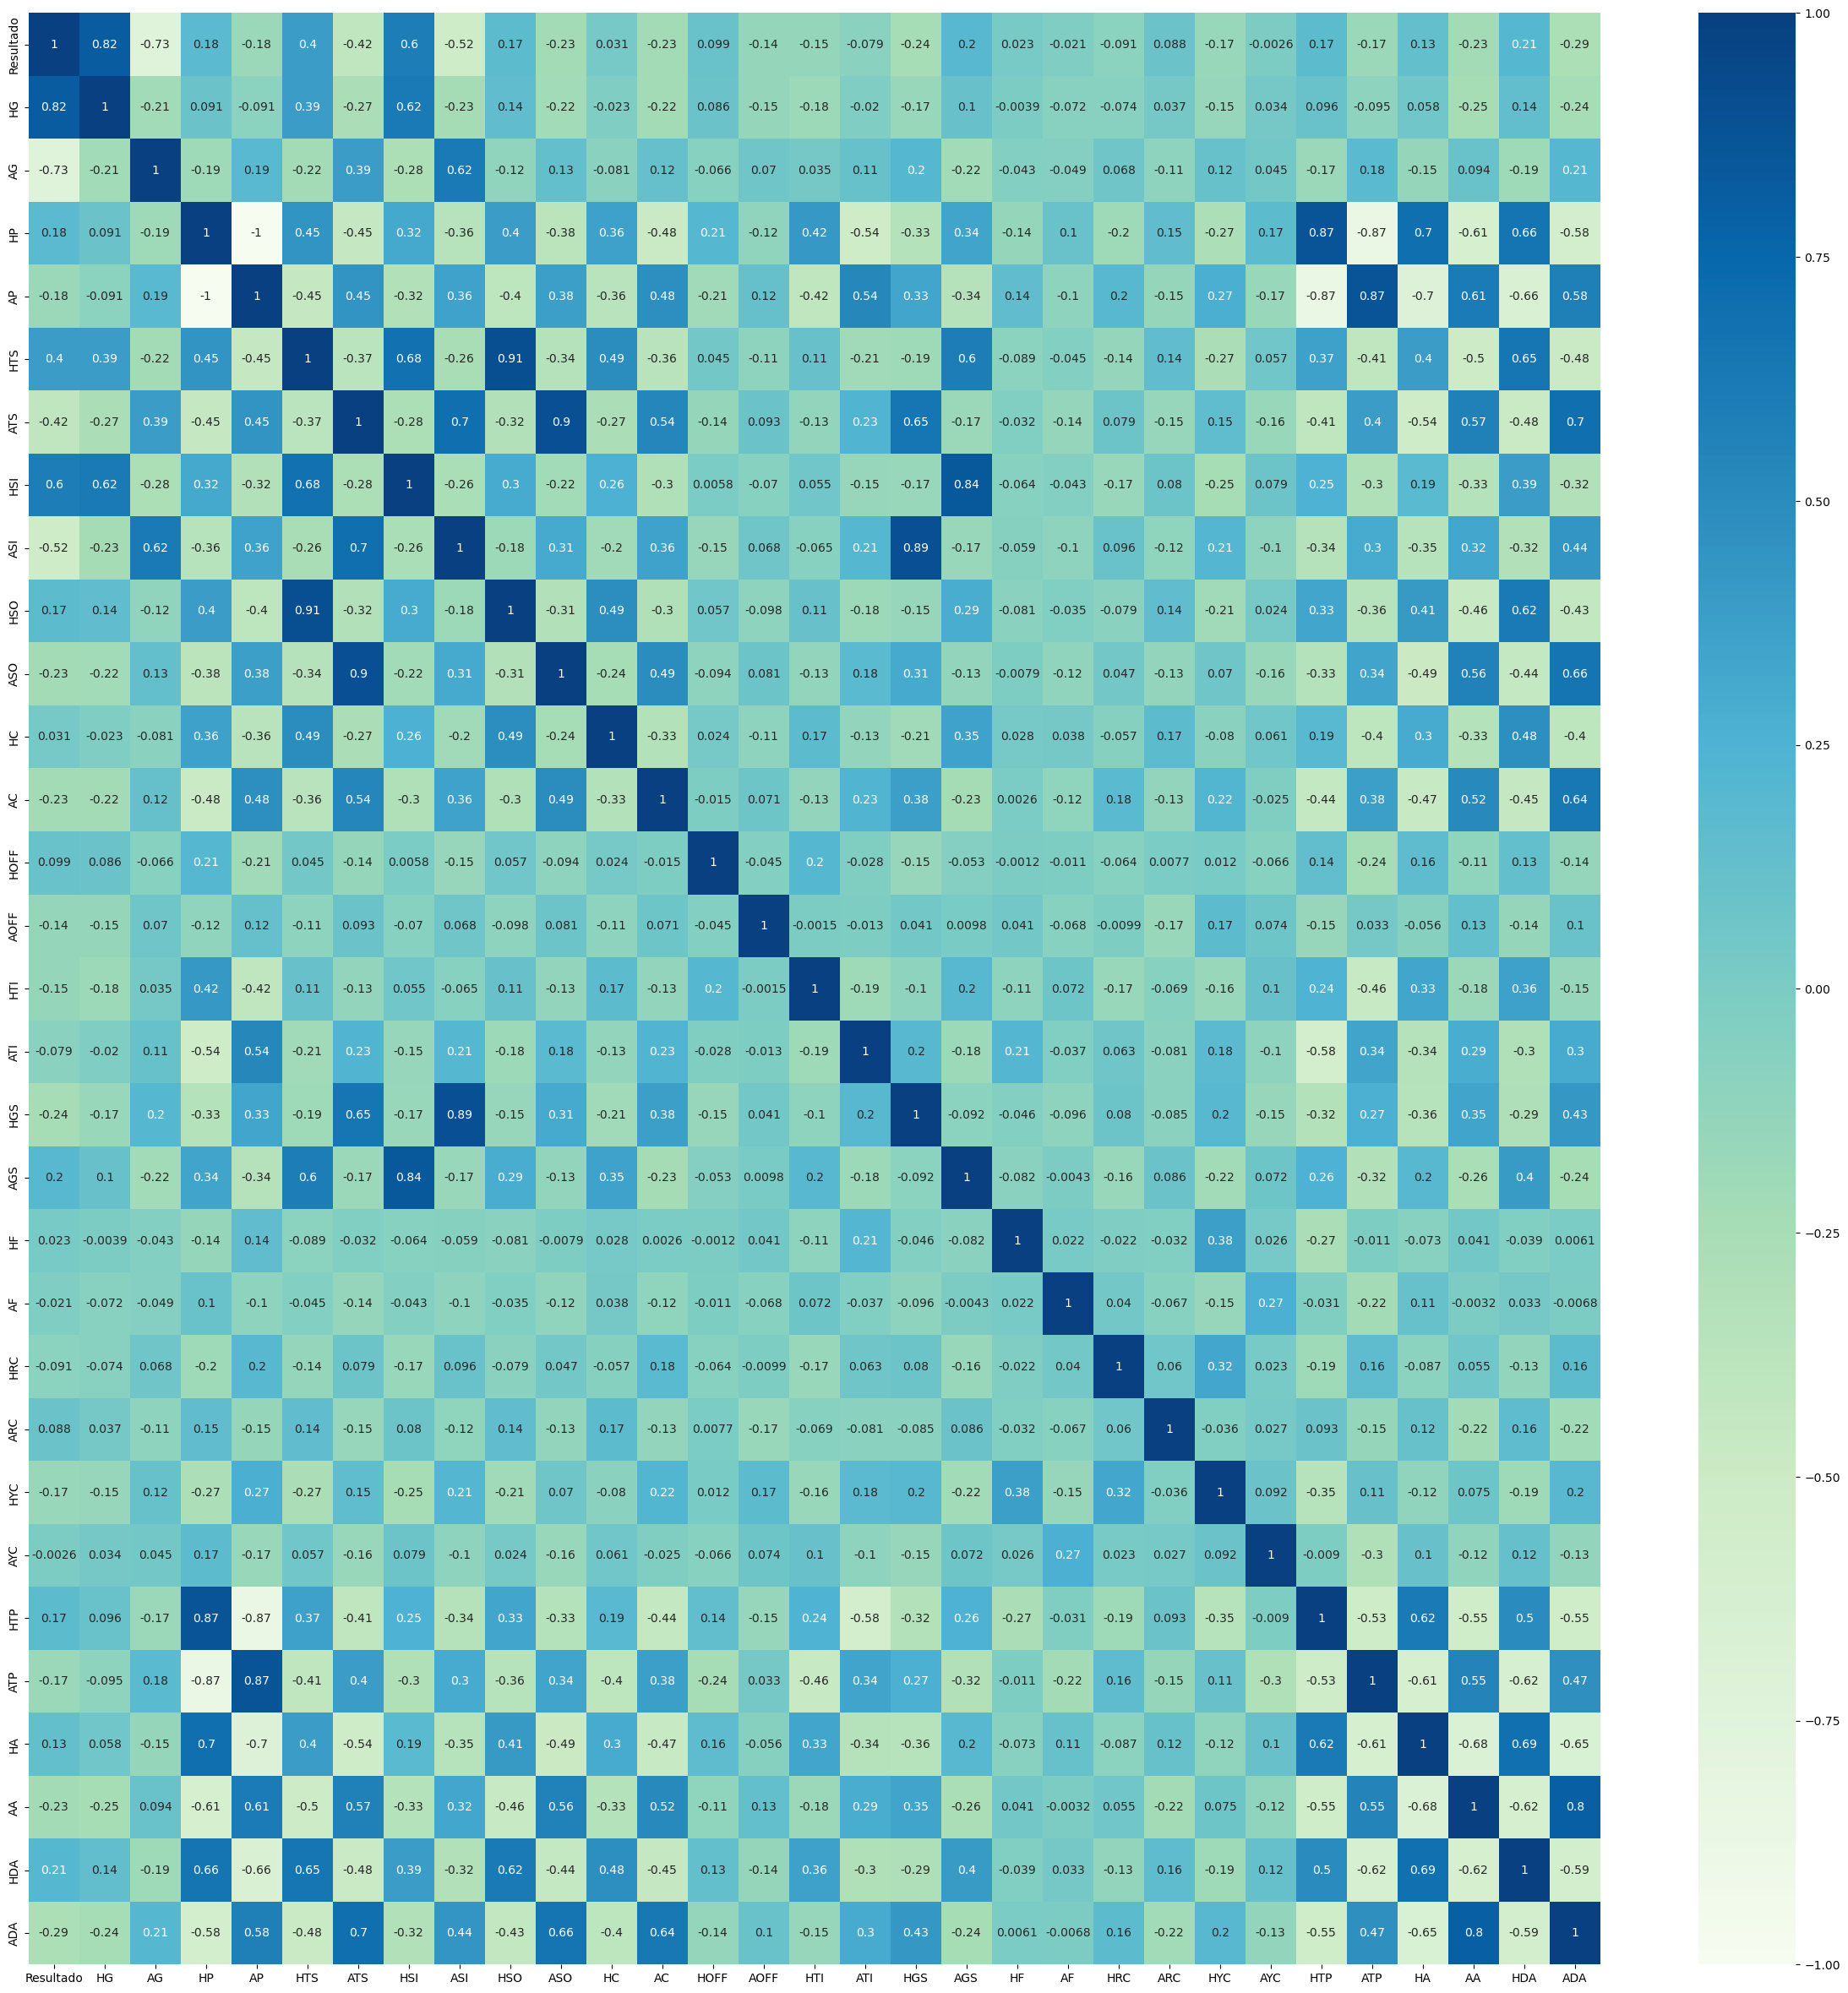

In [14]:
# Se revisa si la variable objetivo está correlacionada con otra variable
plt.figure(figsize =(30,30))
correlacion = df_data.corr()
sns.heatmap(correlacion, cmap = 'GnBu', annot = True)

C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs

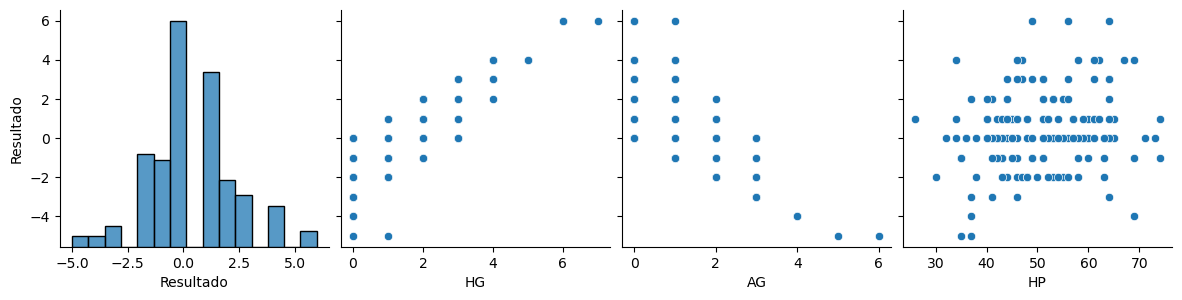

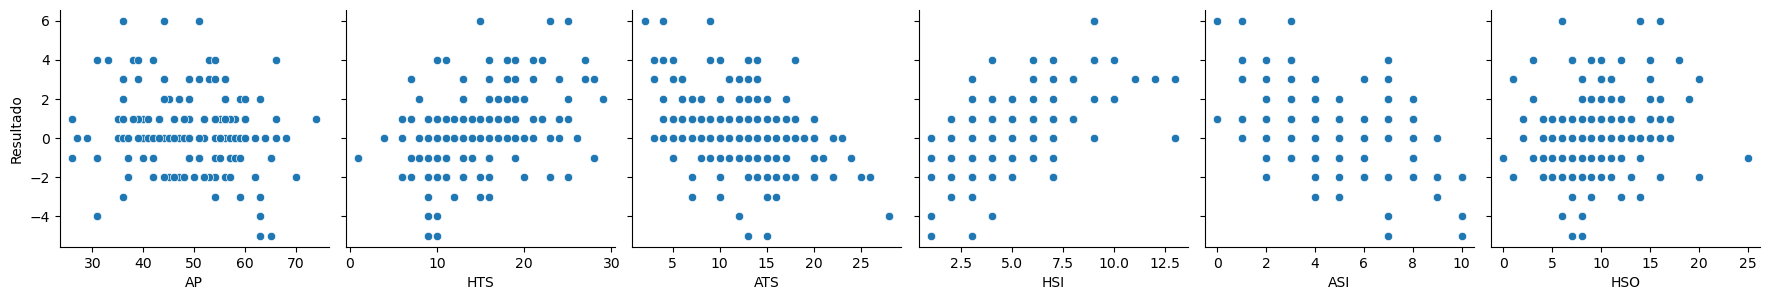

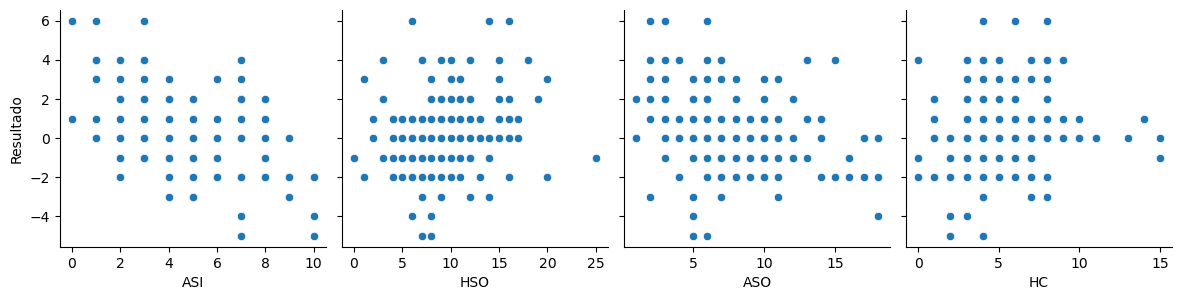

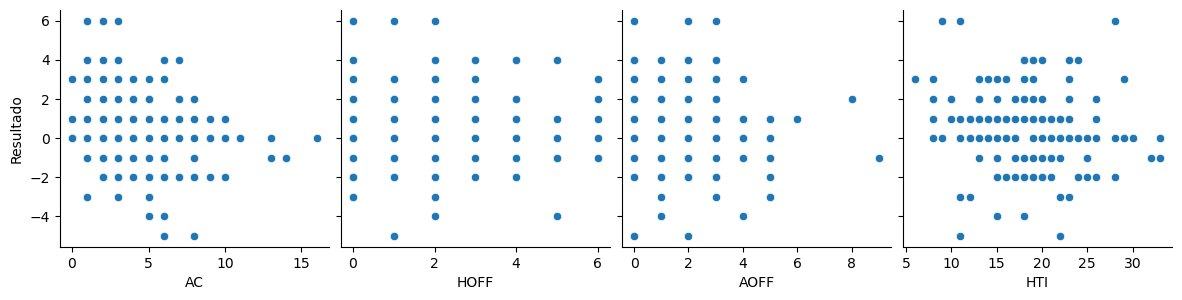

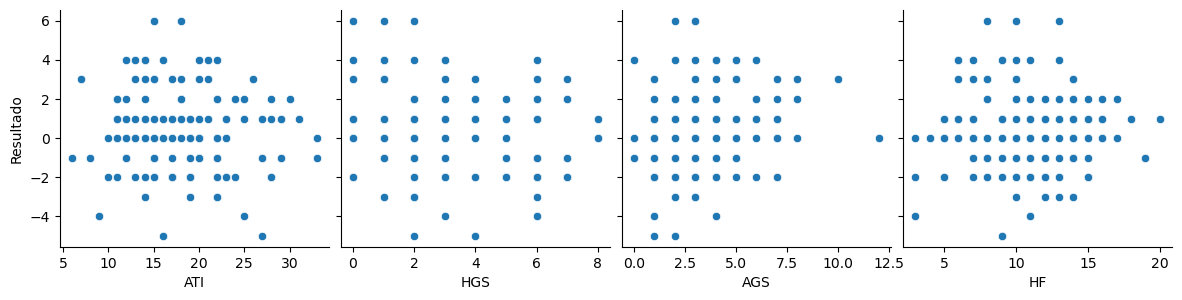

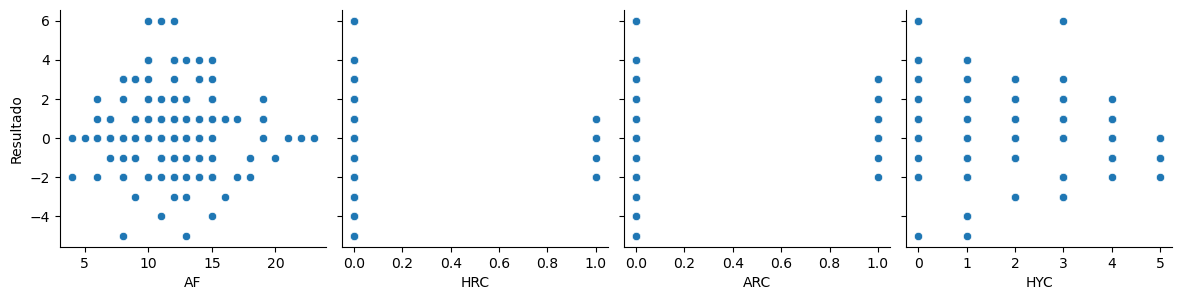

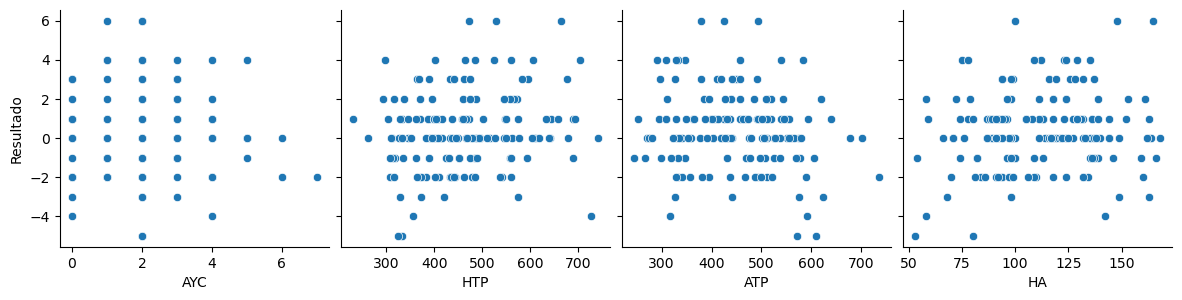

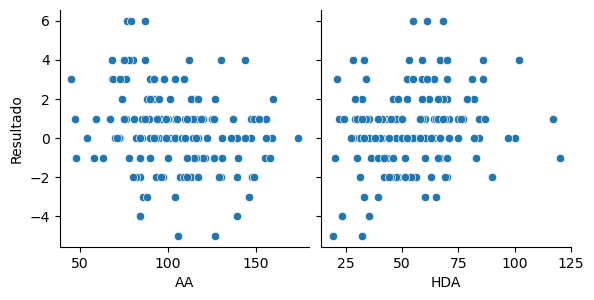

In [15]:
# Se diagrama la relación entre cada variable explicativa y la variable objetivo
sns.pairplot(df_data, height=3, y_vars = 'Resultado', x_vars = df_data.columns[0:4], kind='scatter')
sns.pairplot(df_data, height=3, y_vars = 'Resultado', x_vars = df_data.columns[4:10], kind='scatter')
sns.pairplot(df_data, height=3, y_vars = 'Resultado', x_vars = df_data.columns[8:12], kind='scatter')
sns.pairplot(df_data, height=3, y_vars = 'Resultado', x_vars = df_data.columns[12:16], kind='scatter')
sns.pairplot(df_data, height=3, y_vars = 'Resultado', x_vars = df_data.columns[16:20], kind='scatter')
sns.pairplot(df_data, height=3, y_vars = 'Resultado', x_vars = df_data.columns[20:24], kind='scatter')
sns.pairplot(df_data, height=3, y_vars = 'Resultado', x_vars = df_data.columns[24:28], kind='scatter')
sns.pairplot(df_data, height=3, y_vars = 'Resultado', x_vars = df_data.columns[28:30], kind='scatter')

### 4. Modelamiento

In [16]:
columns_to_drop = ['HG', 'AG', 'HTS', 'ATS', 'AP']
df_data = df_data.drop(columns=columns_to_drop)

#### Pipeline 1: Modelo con eliminación de valores atípicos en la variable objetivo y estandarización

In [17]:
# Se usa un transformador para seleccionar unicamente las columnas que se quieren usar
final_columns = df_data.columns.tolist()
final_columns.remove('Resultado')

# Se declara el modelo
model = [('model', LinearRegression())]

pre = [('scaler', StandardScaler())]

# Se declara el pipeline
pipeline1 = Pipeline(pre+model)

In [18]:
# Se extraen las variables explicativas y objetivo para entrenar
df_datap1 = df_data

X = df_datap1.drop('Resultado', axis = 1)
Y = df_datap1['Resultado']

# Se realiza la división entrenamiento - test. Se deja 20% de los datos para el test.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Se entrena el modelo
pipeline1 = pipeline1.fit(X_train,Y_train)

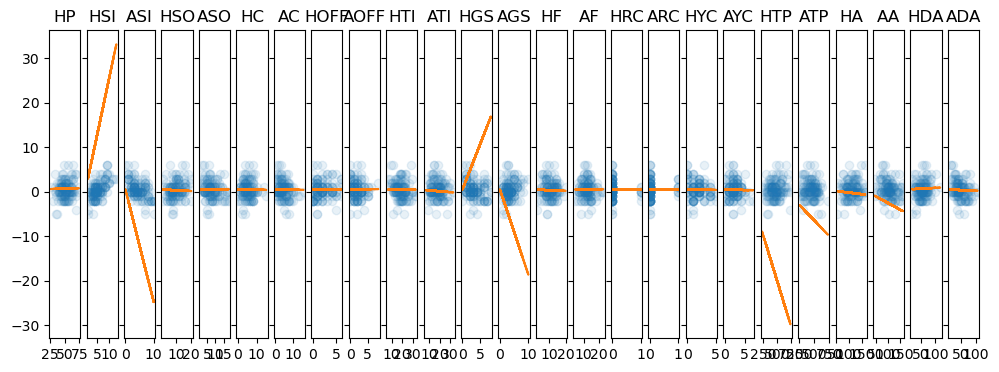

In [19]:
# Se visualiza la regresion lineal en cada dimension
f, axs = plt.subplots(1, len(final_columns), sharey=True, figsize = (12,4))

for i in range(len(final_columns)):
    pos_col = i
    col = final_columns[pos_col]

    # Variable x
    x = X_train[col]
    # Pendiente
    m = pipeline1['model'].coef_[pos_col]
    # Interceto
    b = pipeline1['model'].intercept_

    axs[i].plot(x, Y_train, 'o', alpha = 0.1)
    axs[i].plot(x, x*m + b)
    axs[i].set_title(col)

In [20]:
# Vale la pena hacer estandarización de los datos para tener coeficientes más comparables en misma escala.
importancia = pipeline1['model'].coef_
pd.options.display.float_format = '{:.5f}'.format
importancia_atributo = pd.DataFrame(data={"Atributo": final_columns,"Importancia": importancia})
importancia_atributo = importancia_atributo.sort_values(by='Importancia', ascending=False).reset_index(drop=True)
importancia_atributo

,Atributo,Importancia
0,HSI,2.50949
1,HGS,2.04237
2,ARC,0.02727
3,AOFF,0.01217
4,HRC,0.00577
5,HP,0.00414
6,ASO,0.00371
7,HDA,0.00371
8,AF,0.00222
9,HOFF,-0.00029


In [21]:
# Se obtienen las predicciones del modelo sobre el conjunto de entrenamiento.
y_pred = pipeline1.predict(X_train)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("Estadísticas Pipeline #1 - Datos de entrenamiento")
print("RMSE: %.2f" % np.sqrt(mse(Y_train, y_pred)))
print('R²: %.2f' % r2_score(Y_train, y_pred))

Estadísticas Pipeline #1 - Datos de entrenamiento
RMSE: 0.11
R²: 1.00


In [22]:
# Se obtienen las predicciones del modelo sobre el conjunto de test.
y_pred = pipeline1.predict(X_test)
# Se obtienen las métricas a partir de la predicción y la base de evaluación (valores reales).
print("Estadísticas Pipeline #1 - Datos de test")
print("RMSE: %.2f" % np.sqrt(mse(Y_test, y_pred)))
print('R²: %.2f' % r2_score(Y_test, y_pred))

Estadísticas Pipeline #1 - Datos de test
RMSE: 0.07
R²: 1.00


<Axes: >

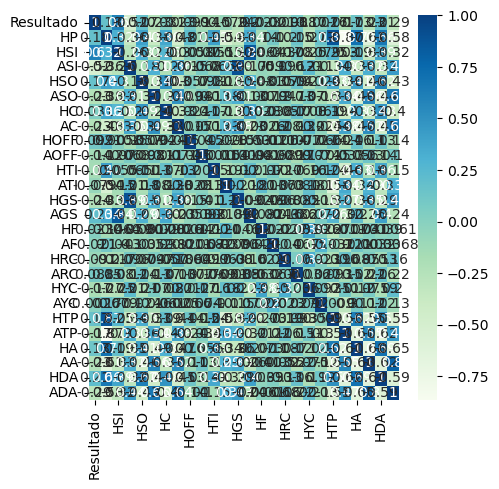

In [23]:
# Se revisa la colinealidad
df_temp = df_datap1[final_columns]
plt.figure(figsize =(5,5))
correlacion = df_datap1.corr()
sns.heatmap(correlacion, cmap = 'GnBu', annot = True)

C:\Users\USUARIO\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


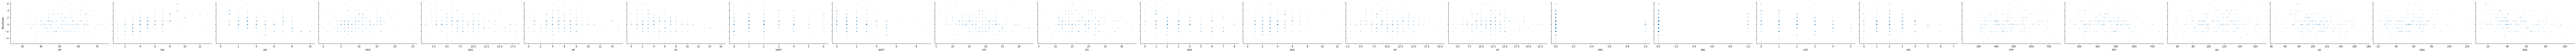

In [24]:
# Linealidad
#Se ven datos relativamente juntos, sin embargo, hay una pequeña cantidad de datos fuera de esta cohesión en las tres variables.
sns.pairplot(df_datap1, height=3, aspect = 2, y_vars = 'Resultado', x_vars = final_columns, kind='scatter', plot_kws = {'alpha':0.1})

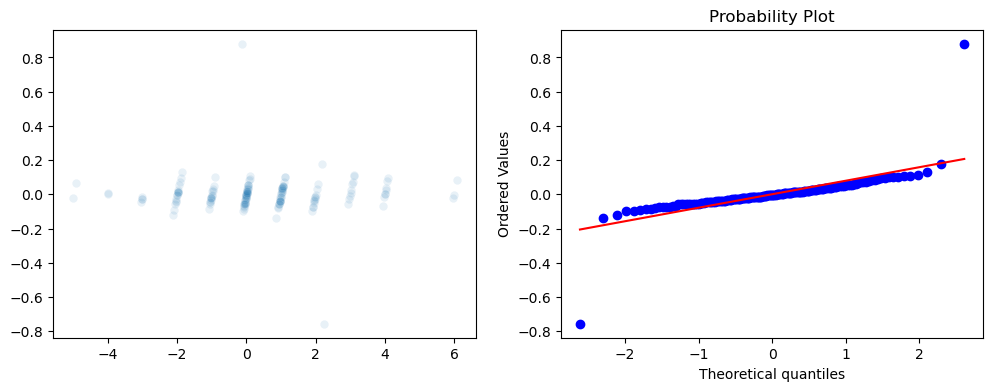

In [25]:
# Nos sirve para revisar si los errores vienen con una distribución teoríca. En este caso, de una distribución normal.
X = df_data.drop('Resultado', axis = 1)
y = df_data['Resultado']

# Calculamos los errores
errors = (pipeline1.predict(X) - y).values

fig, axes = plt.subplots(1, 2, figsize = (12,4))

# Dispersión
sns.scatterplot(x = pipeline1.predict(X), y = errors, alpha = 0.1, ax = axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

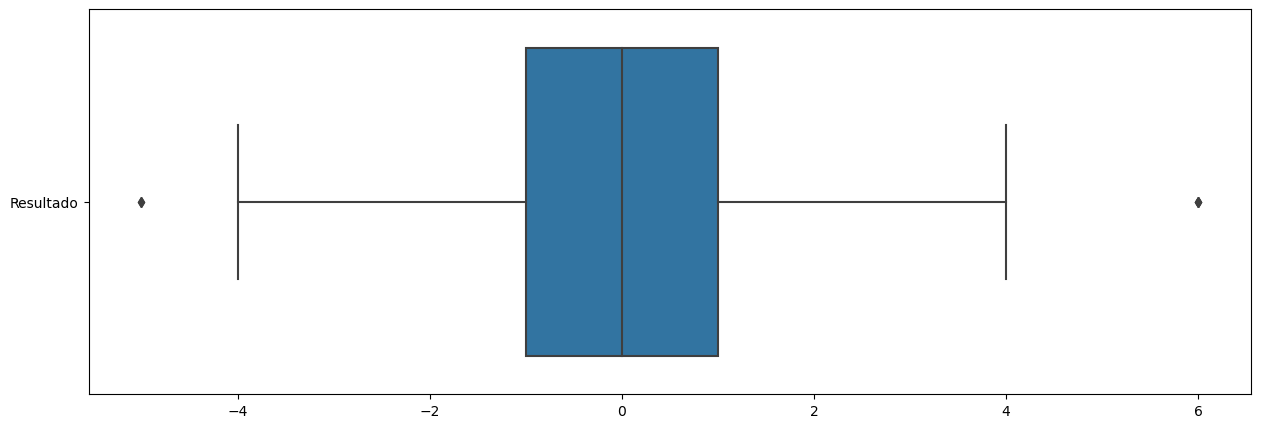

In [26]:
# Diagrama de caja
# Acá podemos ver los valores atípicos de Life expectancy.
# En este caso están los menores a 44.5.
fig=plt.figure(figsize=(15,5))
ax = sns.boxplot(data= df_datap1[['Resultado']], orient="h")

### 5. Evaluación cuantitativa

In [27]:
# Se ajusta el modelo para ver el reporte de estadísticas
model = sm.OLS(Y, X).fit()
# Se muestran las estadísticas del modelo
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              Resultado   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              1849.
Date:                Wed, 27 Dec 2023   Prob (F-statistic):                   1.80e-153
Time:                        14:18:53   Log-Likelihood:                          128.20
No. Observations:                 155   AIC:                                     -206.4
Df Residuals:                     130   BIC:                                     -130.3
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HP             0.0089      0.004      2.141      0.034       0.001       0.017
HSI            1.0064      0.008    129.773      0.000       0.991       1.022
ASI           -1.0013      0.009   -110.561      0.000      -1.019      -0.983
HSO           -0.0029      0.003     -0.974      0.332      -0.009       0.003
ASO           -0.0004      0.003     -0.137      0.891      -0.007       0.006
HC            -0.0011      0.004     -0.253      0.800      -0.010       0.008
AC            -0.0011      0.004     -0.271      0.787      -0.009       0.007
HOFF          -0.0002      0.006     -0.024      0.980      -0.013       0.012
AOFF           0.0052      0.006      0.885      0.378      -0.006       0.017
HTI           -0.0005      0.002     -0.236      0.813      -0.005       0.004
ATI           -0.0019      0.002     -0.927      0.356      -0.006       0.002
HGS            1.0057      0.011     89.502      0.000       0.983       1.028
AGS           -1.0117      0.010   -102.067      0.000      -1.031      -0.992
HF            -0.0040      0.003     -1.230      0.221      -0.010       0.002
AF             0.0002      0.003      0.069      0.945      -0.006       0.006
HRC           -0.0063      0.039     -0.161      0.873      -0.083       0.071
ARC            0.0633      0.033      1.915      0.058      -0.002       0.129
HYC           -0.0090      0.009     -0.958      0.340      -0.028       0.010
AYC           -0.0139      0.008     -1.716      0.088      -0.030       0.002
HTP           -0.0007      0.000     -2.137      0.034      -0.001   -5.14e-05
ATP            0.0004      0.000      2.109      0.037    2.26e-05       0.001
HA            -0.0004      0.001     -0.654      0.514      -0.002       0.001
AA            -0.0012      0.001     -1.671      0.097      -0.003       0.000
HDA            0.0002      0.001      0.204      0.838      -0.002       0.002
ADA            0.0004      0.001      0.389      0.698      -0.002       0.002
==============================================================================
Omnibus:                      105.773   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20624.805
Skew:                          -1.185   Prob(JB):                         0.00
Kurtosis:                      59.462   Cond. No.                     2.84e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.84e+03. This might indicate that there are
strong multicollinearit

In [29]:
# Se guarda el pipeline en el archivo
filename = 'modelo.joblib' # Ubicación del archivo a entregar
dump(pipeline1, filename)

['modelo.joblib']

In [36]:
# Proceso de prueba del cliente
df_recent_full = pd.read_csv(f"../data/2023-24/version{version}/proximos/{pais}_{liga}_23-24.csv", sep=',', encoding = 'utf-8', na_values = '-') # Lectura de los datos recientes
df_recent = df_recent_full[final_columns]
# Se lee el archivo y carga el modelo
pipeline = load(filename)

y_predicted = pipeline.predict(df_recent)

In [37]:
for i in y_predicted[:29]:
    print ("{:.2f}".format(i).replace('.', ','))

0,87
-1,42
0,08
0,96
1,02
0,04
0,04
2,01
-0,57
1,35
1,04
-0,76
0,87
-0,44
-1,86
1,20
0,60
1,06
1,47
0,49
-0,68
-1,61
2,17
1,30
-0,39
-0,74
2,56
-1,11
0,45


In [39]:
for i in range(len(y_predicted[:29])):
    home_team = df_recent_full.iloc[i]["HomeTeam"]
    away_team = df_recent_full.iloc[i]["AwayTeam"]
    
    print(home_team + " vs " + away_team)
    print(y_predicted[i])
    ganador = home_team if y_predicted[i] >= 0.75 else (away_team if y_predicted[i] <= -0.75 else "ninguno")
    if ganador == "ninguno":
            print("No hay ganador claro. " + str(abs(y_predicted[i]))[:4])
    else:
        print("Gana " + ganador + " por " + str(abs(y_predicted[i]))[:4] + " goles")
    print()

Anderlecht vs Círculo Brujas
0.8686976926244756
Gana Anderlecht por 0.86 goles

Charleroi vs KV Mechelen
-1.4180627913327652
Gana KV Mechelen por 1.41 goles

Gent vs KV Mechelen
0.07912058658966314
No hay ganador claro. 0.07

Genk vs Círculo Brujas
0.9550438198876853
Gana Genk por 0.95 goles

St. Lieja vs Kortrijk
1.0241019842074037
Gana St. Lieja por 1.02 goles

Club Brujas vs Westerlo
0.04478166124829891
No hay ganador claro. 0.04

Antwerp vs Charleroi
0.04059356688050891
No hay ganador claro. 0.04

Royale Union SG vs St. Truiden
2.0122214315633227
Gana Royale Union SG por 2.01 goles

Leuven vs Anderlecht
-0.5673683635285149
No hay ganador claro. 0.56

RWDM vs Eupen
1.3530006984764928
Gana RWDM por 1.35 goles

Círculo Brujas vs St. Lieja
1.0392611186554346
Gana Círculo Brujas por 1.03 goles

Kortrijk vs Leuven
-0.7610171702400863
Gana Leuven por 0.76 goles

Gent vs Westerlo
0.8740766050669199
Gana Gent por 0.87 goles

Charleroi vs Club Brujas
-0.4389122686796686
No hay ganador claro.